In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

Text(0.5, 1.0, 'FIR filtar sa duzinom 2L = 32')

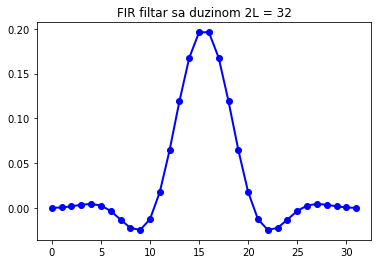

In [19]:
n = 400
fs = 100
t = np.linspace(0, n/fs, n)

# zeljene performanse
width =  #[54 / (fs/2), 25 / (fs/2), 25 / (fs/2), 12 / (fs / 2)]
ripple_db = 60

N, beta = signal.kaiserord(ripple_db, width) 

cutoff_hz = 10.0
taps = signal.firwin(N, cutoff_hz/(fs / 2), window=('kaiser', beta))

plt.plot(taps, 'bo-', linewidth=2)
plt.title(f'FIR filtar sa duzinom 2L = {N}')
